# Iris 꽃 종류 분류

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

## 1. Data

### 1.1 Data Load
데이터는 `sklearn.datasets`의 `load_iris` 함수를 이용해 받기

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

데이터에서 사용되는 변수 목록  
-> 암술과 수술의 길이와 넓이
- sepal length
- sepal width
- petal length
- petal width


In [3]:
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

정답은 iris 꽃의 종류

In [4]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
data, target = iris["data"], iris["target"]

### 1.2 데이터 EDA

In [7]:
pd.DataFrame(data, columns=iris["feature_names"]).describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### 1.3 Data Split

In [8]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(data, target, train_size=0.7, random_state=2021, stratify=target)

In [9]:
print("train data 개수:", len(train_data))
print("test data 개수:", len(test_data))

train data 개수: 105
test data 개수: 45


### 1.4 시각화

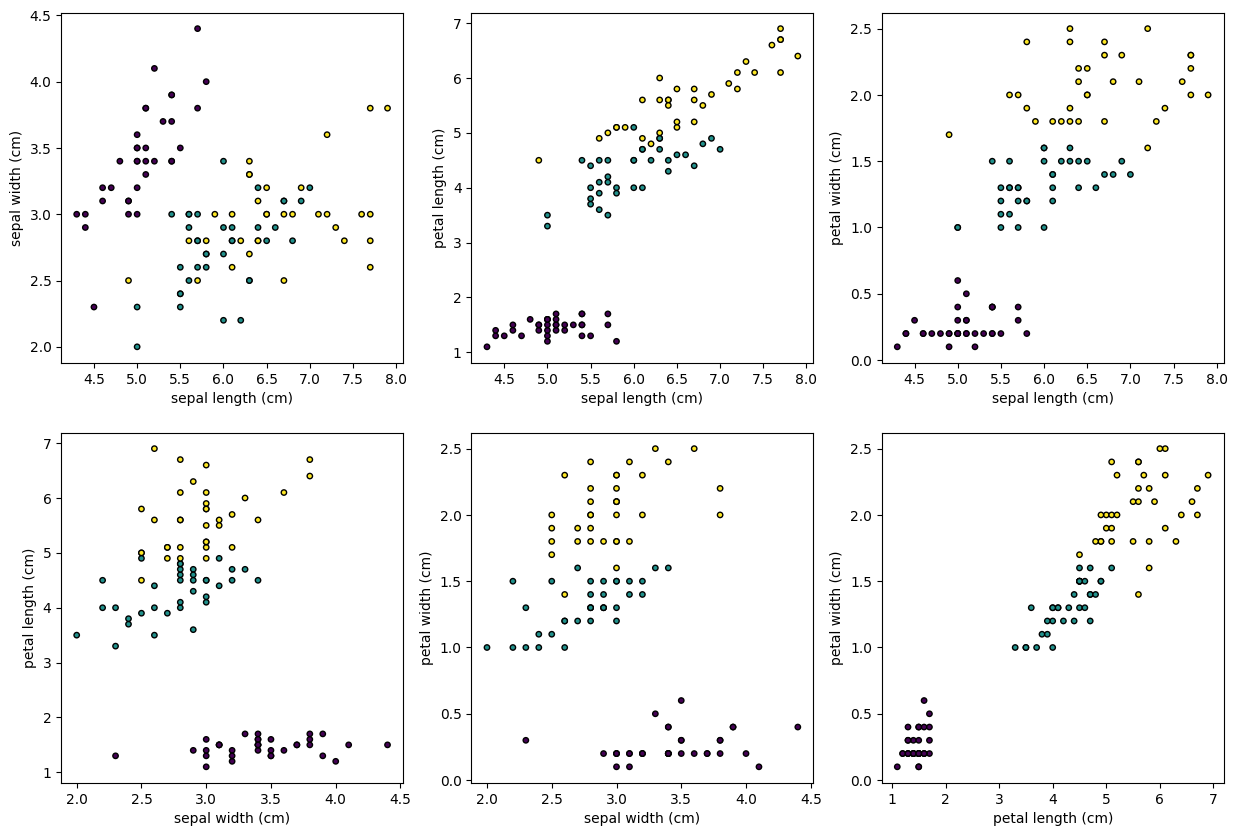

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

pair_combs = [
    [0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]
]

for idx, pair in enumerate(pair_combs):
  x, y = pair
  ax = axes[idx//3, idx%3]
  ax.scatter(x=train_data[:, x], y=train_data[:, y], c=train_target, edgecolor='black', s=15)
  ax.set_xlabel(iris["feature_names"][x])
  ax.set_ylabel(iris["feature_names"][y])

## 2. Decision Tree

In [13]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

gini_tree = DecisionTreeClassifier()

### 2.1 학습

In [14]:
gini_tree.fit(train_data, train_target)

DecisionTreeClassifier()

[Text(0.4, 0.875, 'petal width (cm) <= 0.8\ngini = 0.667\nsamples = 105\nvalue = [35, 35, 35]\nclass = setosa'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]\nclass = setosa'),
 Text(0.6, 0.625, 'petal width (cm) <= 1.65\ngini = 0.5\nsamples = 70\nvalue = [0, 35, 35]\nclass = versicolor'),
 Text(0.4, 0.375, 'petal length (cm) <= 5.35\ngini = 0.102\nsamples = 37\nvalue = [0, 35, 2]\nclass = versicolor'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]\nclass = versicolor'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]\nclass = virginica'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 33\nvalue = [0, 0, 33]\nclass = virginica')]

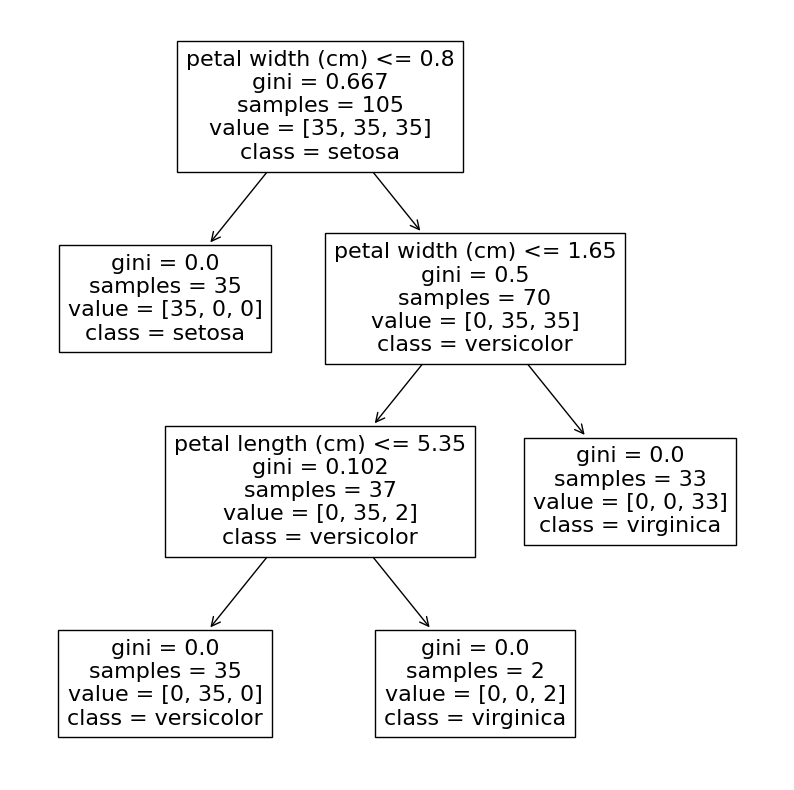

In [15]:
plt.figure(figsize=(10, 10))
plot_tree(gini_tree, feature_names=iris["feature_names"], class_names=iris["target_names"])

### 2.2 Arguments
DecisionTreeClassifier에서 주로 탐색하는 argument들은 다음과 같음  

- criterion
  - 어떤 정보 이득을 기준으로 데이터를 나눌 지 결정
  - "gini", "entropy"
- max_depth
  - 나무의 최대 깊이를 정해줌
- min_samples_split
  - 노드가 나눠질 수 있는 최소 데이터 개수를 정함

<br/>  

각 argument들을 추가로 줬을 때 DecisionTree가 어떻게 변하는 지 확인해보기

#### 2.2.1 max_depth

[Text(0.5, 0.75, 'petal length (cm) <= 2.5\ngini = 0.667\nsamples = 105\nvalue = [35, 35, 35]\nclass = setosa'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]\nclass = setosa'),
 Text(0.75, 0.25, 'gini = 0.5\nsamples = 70\nvalue = [0, 35, 35]\nclass = versicolor')]

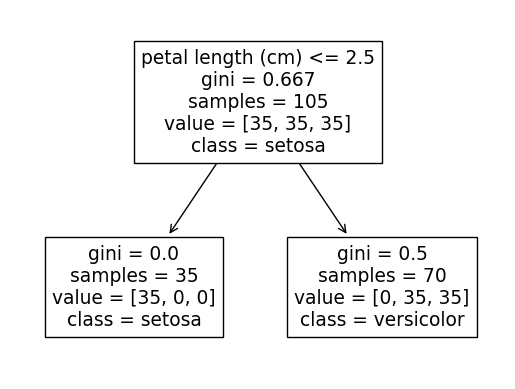

In [16]:
depth_1_tree = DecisionTreeClassifier(max_depth=1)
depth_1_tree.fit(train_data, train_target)

plot_tree(depth_1_tree, feature_names=iris["feature_names"], class_names=iris["target_names"])

#### 2.2.2 min_samples_split

[Text(0.4, 0.8333333333333334, 'petal length (cm) <= 2.5\ngini = 0.667\nsamples = 105\nvalue = [35, 35, 35]\nclass = setosa'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]\nclass = setosa'),
 Text(0.6, 0.5, 'petal width (cm) <= 1.65\ngini = 0.5\nsamples = 70\nvalue = [0, 35, 35]\nclass = versicolor'),
 Text(0.4, 0.16666666666666666, 'gini = 0.102\nsamples = 37\nvalue = [0, 35, 2]\nclass = versicolor'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 33\nvalue = [0, 0, 33]\nclass = virginica')]

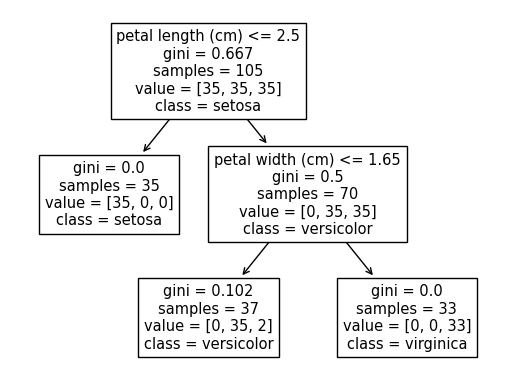

In [18]:
sample_50_tree = DecisionTreeClassifier(min_samples_split=50)
sample_50_tree.fit(train_data, train_target)

plot_tree(sample_50_tree, feature_names=iris["feature_names"], class_names=iris["target_names"])

#### 2.2.3 criterion

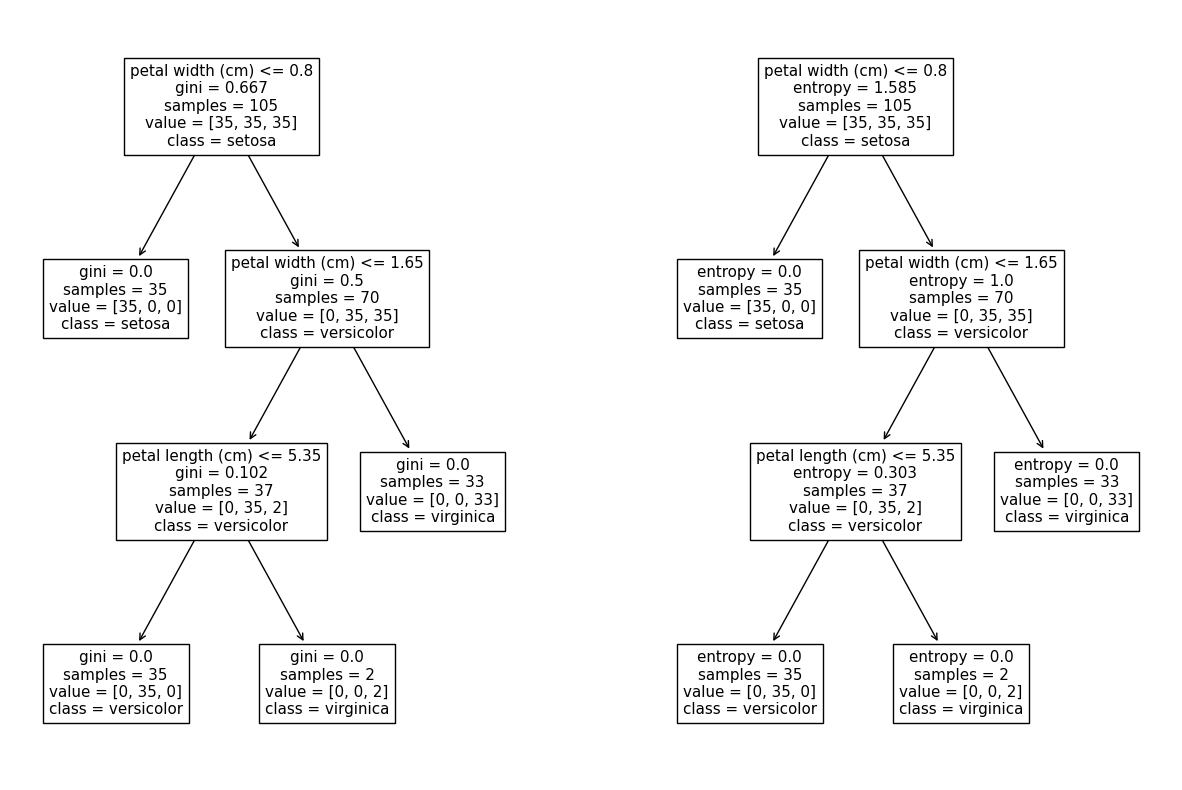

In [19]:
entropy_tree = DecisionTreeClassifier(criterion="entropy")
entropy_tree.fit(train_data, train_target)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
plot_tree(gini_tree, feature_names=iris["feature_names"], class_names=iris["target_names"], ax=axes[0])
plot_tree(entropy_tree, feature_names=iris["feature_names"], class_names=iris["target_names"], ax=axes[1])
plt.show()

### 2.3 예측

In [20]:
trees = [
    ("gini_tree", gini_tree),
    ("entropy_tree", entropy_tree),
    ("depth=1 tree", depth_1_tree),
    ("sample=50 tree", sample_50_tree)
]

In [22]:
train_preds = []
test_preds = []
for tree_name, tree in trees:
  train_pred = tree.predict(train_data)
  test_pred = tree.predict(test_data)
  train_preds += [train_pred]
  test_preds += [test_pred]

### 2.3 평가하기

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
for idx, (tree_name, tree) in enumerate(trees):
  train_acc = accuracy_score(train_target, train_preds[idx])
  test_acc = accuracy_score(test_target, test_preds[idx])
  print(tree_name)
  print(f"\t train accuray is {train_acc:.2f}")
  print(f"\t test accuray is {test_acc:.2f}")

gini_tree
	 train accuray is 1.00
	 test accuray is 0.91
entropy_tree
	 train accuray is 1.00
	 test accuray is 0.91
depth=1 tree
	 train accuray is 0.67
	 test accuray is 0.67
sample=50 tree
	 train accuray is 0.98
	 test accuray is 0.91


### 2.4 Feature Importance

In [26]:
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [27]:
gini_tree.feature_importances_

array([0.        , 0.        , 0.05405405, 0.94594595])

In [25]:
gini_feature_importance = pd.Series(gini_tree.feature_importances_, index=iris["feature_names"])

In [29]:
gini_feature_importance

sepal length (cm)    0.000000
sepal width (cm)     0.000000
petal length (cm)    0.054054
petal width (cm)     0.945946
dtype: float64

<Axes: title={'center': 'gini tree feature importance'}>

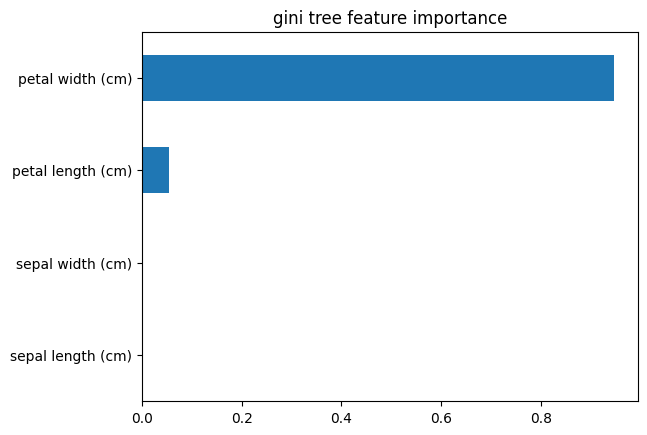

In [28]:
gini_feature_importance.plot(kind="barh", title="gini tree feature importance")

In [31]:
sample_50_feature_importance = pd.Series(
    sample_50_tree.feature_importances_,
    index=iris["feature_names"]
)

<Axes: title={'center': 'sample=50 tree feature importance'}>

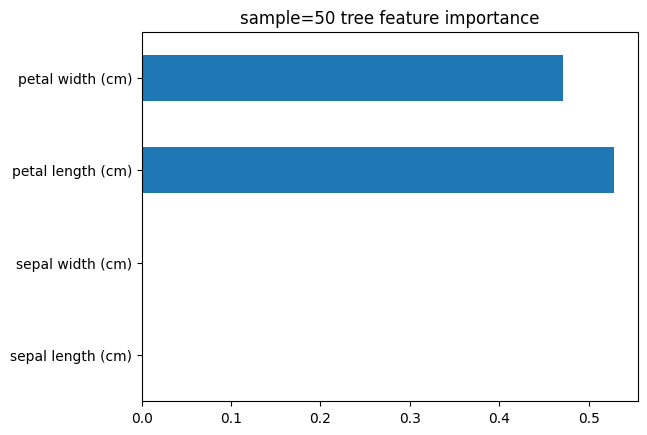

In [32]:
sample_50_feature_importance.plot(kind="barh", title="sample=50 tree feature importance")

In [43]:
def plot_decision_boundary(pair_data, pair_tree, ax):
  x_min, x_max = pair_data[:, 0].min() -1, pair_data[:, 0].max() + 1
  y_min, y_max = pair_data[:, 1].min() -1, pair_data[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                       np.arange(y_min, y_max, 0.02))
  
  Z = pair_tree.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = ax.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

  # plot the training points
  for i, color in zip(range(3), 'ryb'):
    idx = np.where(train_target == 1)
    ax.scatter(pair_data[idx, 0], pair_data[idx, 1], c=color, label=iris["target_names"][i],
               cmap=plt.cm.RdYlBu, edgecolor="black", s=15)
    return ax

<ipython-input-43-7b1f8f4c308b>:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(pair_data[idx, 0], pair_data[idx, 1], c=color, label=iris["target_names"][i],
<ipython-input-43-7b1f8f4c308b>:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(pair_data[idx, 0], pair_data[idx, 1], c=color, label=iris["target_names"][i],
<ipython-input-43-7b1f8f4c308b>:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(pair_data[idx, 0], pair_data[idx, 1], c=color, label=iris["target_names"][i],
<ipython-input-43-7b1f8f4c308b>:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(pair_data[idx, 0], pair_data[idx, 1], c=color, label=iris["target_names"][i],
<ipython-input-43-7b1f8f4c308b>:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.s

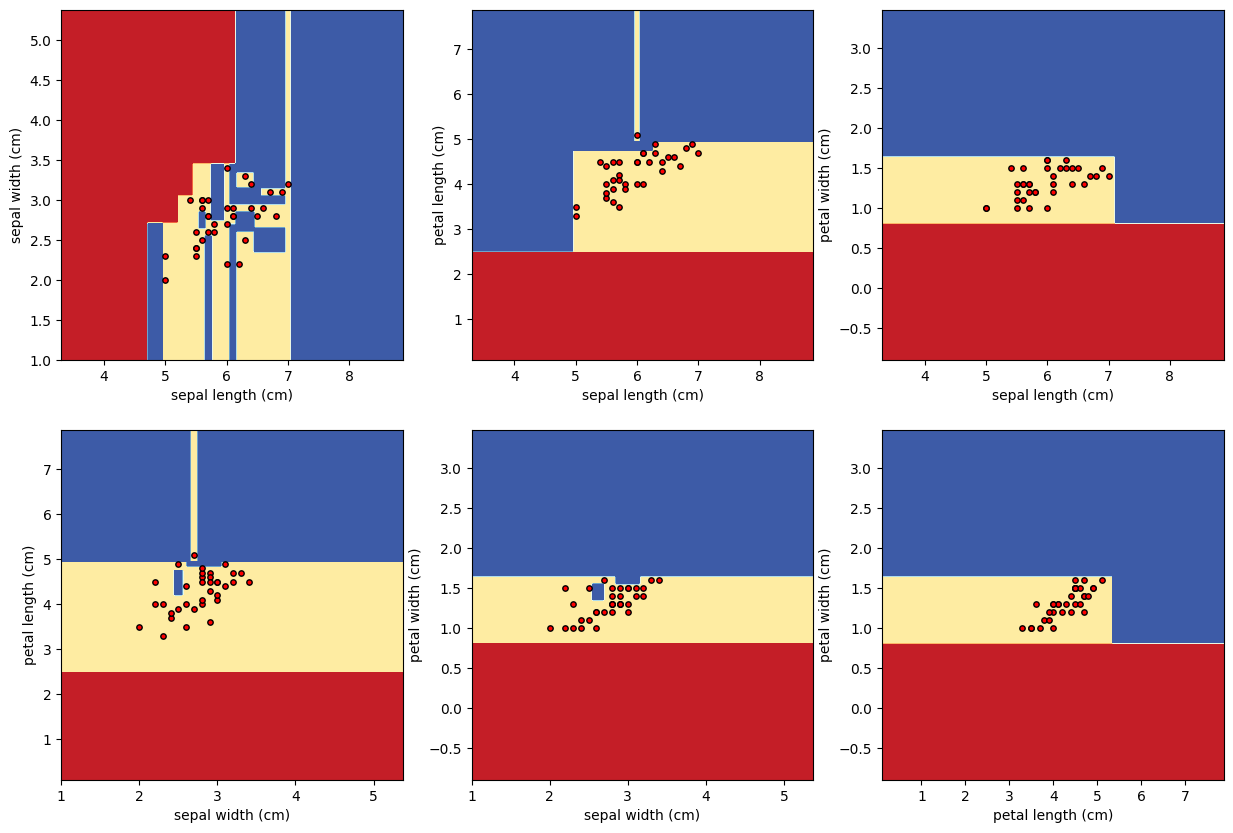

In [44]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

pair_combs = [
    [0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]
]

for idx, pair in enumerate(pair_combs):
  x, y = pair
  pair_data = train_data[:, pair]
  pair_tree = DecisionTreeClassifier().fit(pair_data, train_target)

  ax = axes[idx//3, idx%3]
  ax = plot_decision_boundary(pair_data, pair_tree, ax)
  ax.set_xlabel(iris["feature_names"][x])
  ax.set_ylabel(iris["feature_names"][y])